In [1]:
# run in Python 3 !
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from sklearn.metrics import accuracy_score
%matplotlib inline

# Generate points

In [2]:
def generate_s_shaped_data(gap=3):
    X = np.random.randn(80, 2)

    X[10:20] += np.array([3, 4])
    X[20:30] += np.array([0, 8])
    X[30:40] += np.array([3, 12])

    X[40:50] += np.array([gap, 0])
    X[50:60] += np.array([3 + gap, 4])
    X[60:70] += np.array([gap, 8])
    X[70:80] += np.array([3 + gap, 12])

    y = np.hstack([np.zeros(40), np.ones(40)])

    return X, y

X: (80, 2)
y: (80,)


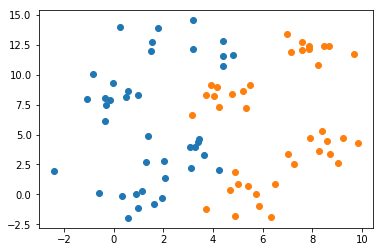

In [3]:
X, y = generate_s_shaped_data(5)
print('X:', X.shape)
print('y:', y.shape)

plt.plot(X[y==0, 0], X[y==0, 1], "o")
plt.plot(X[y==1, 0], X[y==1, 1], "o")
plt.show()

# Forward pass and backprop

In [4]:
def forward(X, V, c, W, b):
    t = X.dot(V) + c
    h = scipy.special.expit(t)    
    s = h.dot(W) + b
    y_hat = scipy.special.expit(s)
    
    return X, V, c, t, h, W, b, s, y_hat

In [5]:
def backprop(y, X, V, c, t, h, W, b, s, y_hat):
    grad_b = y_hat - y
    grad_W = h.T * grad_b
    grad_h = grad_b * W.T
    
    grad_c = h*(1-h) * grad_h
    grad_V = X.T.dot(grad_c)
    
    return grad_V, grad_c, grad_W, grad_b

# Initialization and training (SGD online)

In [6]:
X = (X-X.mean(axis=0)) / X.std(axis=0)

In [7]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [8]:
num_points = X.shape[0]
num_features = X.shape[1]
num_hidden = 5
num_output = 1

std = 0.1
V = std * np.random.randn(num_features, num_hidden)
c = np.zeros((1, num_hidden))
W = std * np.random.randn(num_hidden, num_output)
b = np.zeros((1, num_output))

print('X:', X.shape)
print('y:', y.shape)
print('V:', V.shape)
print('c:', c.shape)
print('W:', W.shape)
print('b:', b.shape)

X: (80, 2)
y: (80,)
V: (2, 5)
c: (1, 5)
W: (5, 1)
b: (1, 1)


In [9]:
def plot_decision_boundary(X, V, c, W, b, y):
    x1_min, x2_min = X.min(axis=0)
    x1_max, x2_max = X.max(axis=0)

    x1s = np.linspace(x1_min, x1_max, num=100)
    x2s = np.linspace(x2_min, x2_max, num=100)
    x1_grid, x2_grid = np.meshgrid(x1s, x2s)
    
    x_grid_flatten = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    y_grid = forward(x_grid_flatten, V, c, W, b)[-1].reshape(x1_grid.shape)

    plt.contour(x1_grid, x2_grid, y_grid)
    plt.plot(X[y==0, 0], X[y==0, 1], "o")
    plt.plot(X[y==1, 0], X[y==1, 1], "o")
    plt.show()

iter 0: accuracy 0.500000
iter 3: accuracy 0.800000
iter 4: accuracy 0.850000
iter 5: accuracy 0.887500
iter 6: accuracy 0.912500
iter 110: accuracy 0.925000
iter 112: accuracy 0.937500
iter 123: accuracy 0.950000
iter 158: accuracy 0.962500
iter 159: accuracy 0.975000
iter 174: accuracy 0.987500
iter 204: accuracy 1.000000


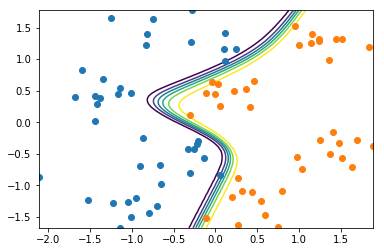

In [10]:
eta = 0.1
num_epoch = 500
accuracy = 0
for k in range(num_epoch):
    for i in range(num_points):
        tmp = forward(X[i, None], V, c, W, b)
        grad_V, grad_c, grad_W, grad_b = backprop(y[i], *tmp)

        V -= eta * grad_V
        c -= eta * grad_c
        W -= eta * grad_W
        b -= eta * grad_b
    
    y_hat = forward(X, V, c, W, b)[-1].round()
    if accuracy_score(y, y_hat) > accuracy:
        accuracy = accuracy_score(y, y_hat)
        print('iter %d: accuracy %lf'%(k, accuracy))
plot_decision_boundary(X, V, c, W, b, y)

In [11]:
A = np.arange(6).reshape(2, 3)
print('A:')
print(A)
print('A[0]      \t', A[0].shape, A[0])
print('A[0, :]   \t', A[0, :].shape, A[0, :])
print('A[0, None]\t', A[0, None].shape, A[0, None])
print('A[[0]]    \t', A[[0]].shape, A[[0]])

A:
[[0 1 2]
 [3 4 5]]
A[0]      	 (3,) [0 1 2]
A[0, :]   	 (3,) [0 1 2]
A[0, None]	 (1, 3) [[0 1 2]]
A[[0]]    	 (1, 3) [[0 1 2]]
